In [1]:
# Librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [3]:
# Cargar el archivo
ruta = "/content/0. SolicitantesCrédito (1).xlsx"


XD = pd.read_excel(ruta)

XD.head()


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359


In [4]:
# información

XD.info()
XD.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

,Unnamed: 0,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Total Activos,Total pasivos,Salario,...,Gasto obligatorio,Gasto arriendo,Otros gastos,Monto (EAD),Plazo,Cuota (COP),PreApr,Prob.Default (PD),Score,LGD
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8.378000e+03,8.378000e+03,8.378000e+03,8.378000e+03,...,8.378000e+03,8.378000e+03,8378.000000,8.378000e+03,8378.000000,8.378000e+03,5842.000000,5842.000000,5842.000000,5842.000000
mean,4189.500000,40.913583,1.065648,0.847696,2.919909,2.907301e+06,2.916287e+06,7.595504e+05,2.834592e+06,1.080259e+06,...,4.135109e+05,6.881428e+04,835.521604,2.399185e+06,32.526975,1.351987e+05,0.493495,0.151553,464.606621,0.245785
std,2418.664611,12.226560,1.234956,1.026779,0.986313,2.017422e+06,2.286050e+06,4.848643e+06,6.804449e+06,1.064321e+06,...,5.651201e+05,4.640051e+05,12900.623595,2.025752e+06,12.677205,2.332821e+05,0.500000,0.099407,128.096659,0.161977
min,1.000000,21.000000,0.000000,0.000000,1.000000,2.280000e+03,1.500000e+03,0.000000e+00,0.000000e+00,5.800000e+01,...,0.000000e+00,0.000000e+00,0.000000,2.600670e+03,3.000000,7.639469e+01,0.000000,0.000152,167.758835,0.000219
25%,2095.250000,31.000000,0.000000,0.000000,2.000000,1.306067e+06,1.190909e+06,0.000000e+00,0.000000e+00,2.718375e+05,...,5.200000e+04,0.000000e+00,0.000000,9.443033e+05,24.000000,3.700128e+04,0.000000,0.068455,373.372025,0.106511
50%,4189.500000,41.000000,1.000000,1.000000,3.000000,2.608374e+06,2.416212e+06,0.000000e+00,0.000000e+00,7.365225e+05,...,2.010000e+05,0.000000e+00,0.000000,1.900140e+06,36.000000,7.905565e+04,0.000000,0.134861,446.608536,0.223509
75%,6283.750000,49.000000,2.000000,1.000000,3.000000,4.021546e+06,4.055556e+06,0.000000e+00,2.000000e+06,1.573861e+06,...,5.910000e+05,0.000000e+00,0.000000,3.302527e+06,36.000000,1.454417e+05,1.000000,0.228352,535.982391,0.376158
max,8378.000000,73.000000,7.000000,5.000000,6.000000,1.197954e+07,1.620401e+07,9.329050e+07,4.000000e+07,7.274076e+06,...,3.486000e+06,5.280000e+06,200000.000000,1.833981e+07,60.000000,4.042333e+06,1.000000,0.452530,1220.395996,0.644600


In [5]:
# check de filas y columnas
XD_modelo = XD[['Edad', 'Hijos', 'Perscargo', 'Estrato',
                'Ingresos', 'Egresos', 'Monto (EAD)',
                'Plazo', 'Cuota (COP)', 'PreApr']]
XD_modelo.shape


(8378, 10)

In [6]:
# check de filas y columnas limpias
XD_modelo.isnull().sum()
XD_modelo = XD_modelo.dropna(subset=["PreApr"])
XD_modelo.shape

(5842, 10)

In [7]:
# eliminar los nulos
yd = XD_modelo['PreApr'].dropna()

In [8]:

XD_modelo.isnull().sum()



,0
Edad,0
Hijos,0
Perscargo,0
Estrato,0
Ingresos,0
Egresos,0
Monto (EAD),0
Plazo,0
Cuota (COP),0
PreApr,0


In [9]:
# revisar tipo de los datos
XD_modelo.dtypes


,0
Edad,int64
Hijos,int64
Perscargo,int64
Estrato,int64
Ingresos,int64
Egresos,int64
Monto (EAD),float64
Plazo,int64
Cuota (COP),float64
PreApr,float64


In [10]:
# separecion variables
X = XD_modelo[['Edad', 'Hijos', 'Perscargo', 'Estrato',
               'Ingresos', 'Egresos', 'Monto (EAD)',
               'Plazo', 'Cuota (COP)']]

# variable objetivo
y = XD_modelo['PreApr']


In [11]:
# Dado a que se utiliza naive bayes se separa el conjunto de datos
# en datos de prueba y datos de entrenamiento siguiendo asi la
# logica del modelo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [12]:
# estudiar

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)


GaussianNB()

In [13]:
# predicción
y_pred = modelo_nb.predict(X_test)


In [14]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred)


In [17]:
tn = cm[0,0] ; fp = cm[0,1]; fn = cm[1,0]; tp = cm[1,1]

exactitud = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
sensibilidad = recall_score(y_test, y_pred) * 100
especificidad = (tn / (tn + fp)) * 100
tasa_error = 100 - exactitud

print(f"Exactitud: {exactitud:.2f}%  Porcentaje total de clasificaciones correctas")
print(f"Precisión: {precision:.2f}%  Qué tan confiables son las preaprobaciones positivas")
print(f"Sensibilidad: {sensibilidad:.2f}%  Capacidad de detectar correctamente a los preaprobados")
print(f"Especificidad: {especificidad:.2f}%  Capacidad de identificar correctamente a los no preaprobados")
print(f"Tasa de error: {tasa_error:.2f}%  Porcentaje de clasificaciones incorrectas")



Exactitud: 74.96%  Porcentaje total de clasificaciones correctas
Precisión: 81.21%  Qué tan confiables son las preaprobaciones positivas
Sensibilidad: 63.76%  Capacidad de detectar correctamente a los preaprobados
Especificidad: 85.76%  Capacidad de identificar correctamente a los no preaprobados
Tasa de error: 25.04%  Porcentaje de clasificaciones incorrectas


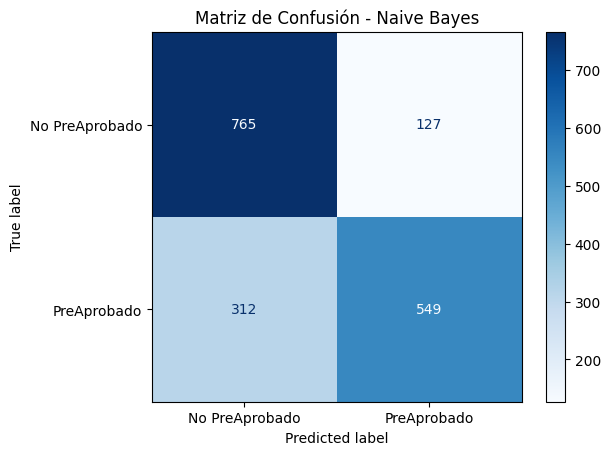

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=["No PreAprobado", "PreAprobado"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()